DATA QUALITY ASSESSMENT : BEFORE

In [13]:
# Import necessary libraries
import os
from PIL import Image
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import cv2

In [6]:
# Path to the dataset
dataset_path = r'Dataset_BUSI_with_GT'

In [7]:
#Function to Check for Each Image Quality
def assess_image_quality(image_path):
    try:
        img = Image.open(image_path)
        # Check resolution
        width, height = img.size
        if width < 128 or height < 128:
            return "Low resolution"
        
        # Check for noise
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        variance = np.var(img_array)
        if variance < 10:
            return "High noise"
        
        return "Good quality"
    except Exception as e:
        return f"Error: {e}"

def assess_folder_quality(folder_path):
    results = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                quality = assess_image_quality(image_path)
                results.append({"Class": class_name, "Image": image_name, "Quality": quality})
    return results

In [8]:
quality_results = assess_folder_quality(dataset_path)

# Create a DataFrame and display it
df = pd.DataFrame(quality_results)
print(df)

       Class                 Image       Quality
0     benign        benign (1).png  Good quality
1     benign   benign (1)_mask.png  Good quality
2     benign       benign (10).png  Good quality
3     benign  benign (10)_mask.png  Good quality
4     benign      benign (100).png  Good quality
...      ...                   ...           ...
1573  normal  normal (97)_mask.png    High noise
1574  normal       normal (98).png  Good quality
1575  normal  normal (98)_mask.png    High noise
1576  normal       normal (99).png  Good quality
1577  normal  normal (99)_mask.png    High noise

[1578 rows x 3 columns]


In [11]:
#Dataset size
num_images = len(df)
num_classes = df['Class'].nunique()
print(f"\nNumber of Images: {num_images}")
print(f"Number of Classes: {num_classes}")


Number of Images: 1578
Number of Classes: 3


In [16]:
#Class distribution
Class_distribution = df.groupby('Class').size().reset_index(name='Number of Images')
Class_distribution

,Class,Number of Images
0,benign,891
1,malignant,421
2,normal,266


<Figure size 800x500 with 0 Axes>

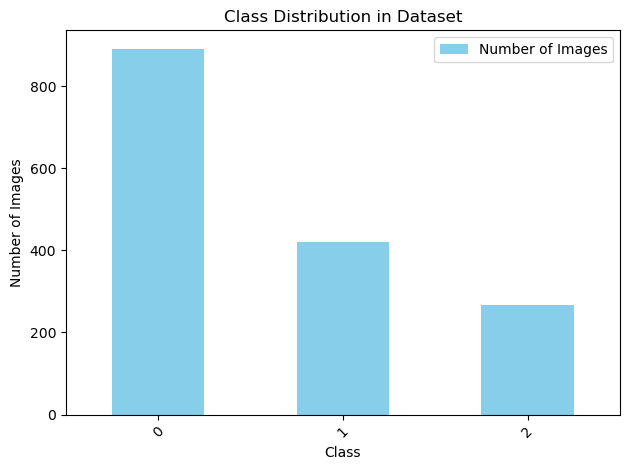

In [18]:
#Visualizing the Class Distribution
plt.figure(figsize=(8, 5))
Class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loading image from: Dataset_BUSI_with_GT/benign\benign (365)_mask.png
Loading image from: Dataset_BUSI_with_GT/benign\benign (171).png
Loading image from: Dataset_BUSI_with_GT/benign\benign (40)_mask.png
Loading image from: Dataset_BUSI_with_GT/benign\benign (363).png
Loading image from: Dataset_BUSI_with_GT/benign\benign (136)_mask.png


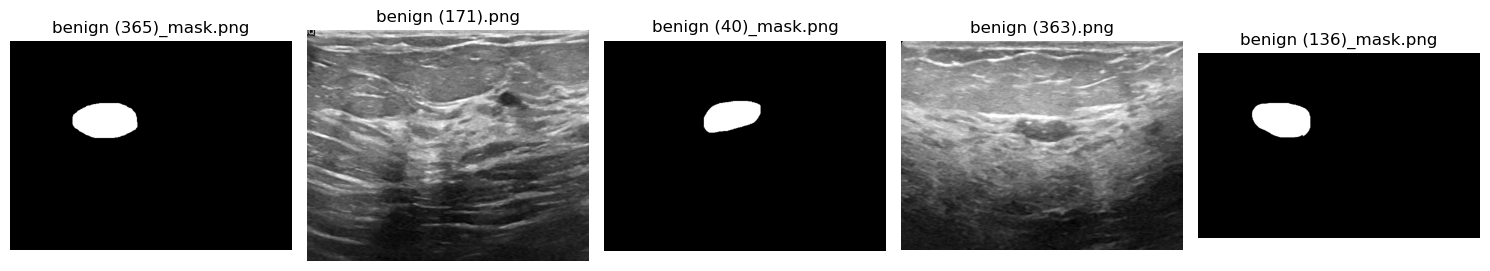

In [20]:
#Visualizing sample image in each class

def display_random_images_from_folder(folder_path, images_to_display=5):
    # List all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Randomly select 5 images
    selected_images = random.sample(all_images, min(images_to_display, len(all_images)))
    
    plt.figure(figsize=(15, 10))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder_path, img_name) 
        print(f"Loading image from: {img_path}")
        try:
            img = Image.open(img_path) # Open the image
            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)
            plt.title(img_name)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

#the folder path containing the images
folder_path = 'Dataset_BUSI_with_GT/benign'

#function to display images
display_random_images_from_folder('Dataset_BUSI_with_GT/benign')

Loading image from: Dataset_BUSI_with_GT/malignant\malignant (48)_mask.png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (57).png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (54).png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (41)_mask.png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (199)_mask.png


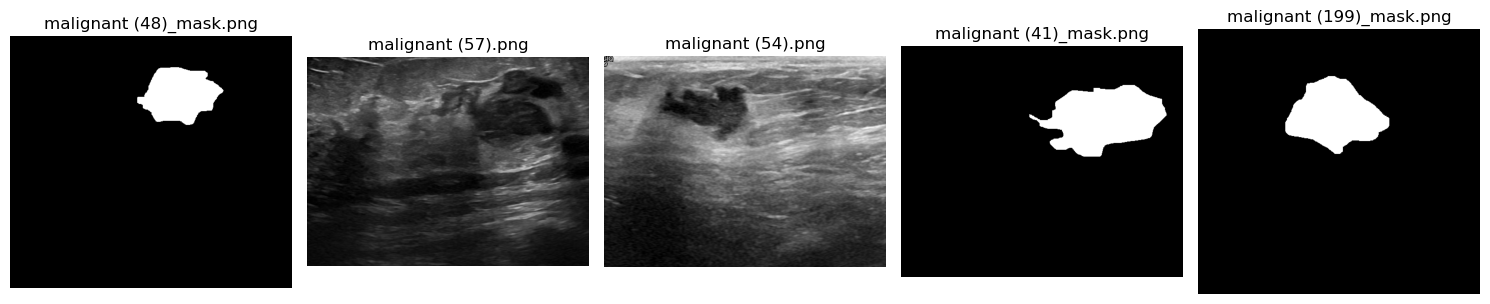

In [21]:
def display_random_images_from_folder(folder_path, images_to_display=5):
    # List all PNG files in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Randomly select 5 images
    selected_images = random.sample(all_images, min(images_to_display, len(all_images)))
    
    plt.figure(figsize=(15, 10))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder_path, img_name)  # Construct full path
        print(f"Loading image from: {img_path}")  # Debugging statement
        try:
            img = Image.open(img_path)  # Open the image
            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)
            plt.title(img_name)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Define the folder path containing the images
folder_path = 'Dataset_BUSI_with_GT/malignant'  # Change this to your desired folder

# Call the function to display images
display_random_images_from_folder('Dataset_BUSI_with_GT/malignant')

Loading image from: Dataset_BUSI_with_GT/normal\normal (128).png
Loading image from: Dataset_BUSI_with_GT/normal\normal (101)_mask.png
Loading image from: Dataset_BUSI_with_GT/normal\normal (78).png
Loading image from: Dataset_BUSI_with_GT/normal\normal (21)_mask.png
Loading image from: Dataset_BUSI_with_GT/normal\normal (127).png


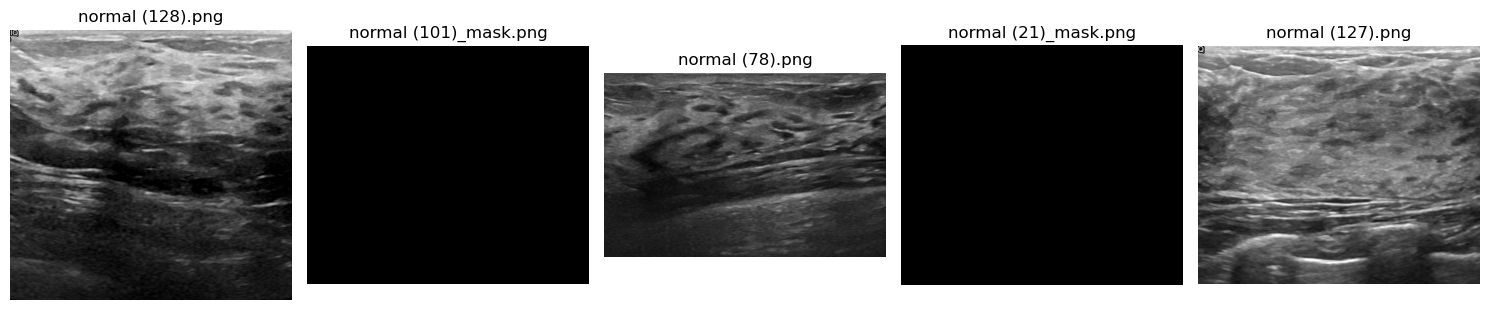

In [22]:
def display_random_images_from_folder(folder_path, images_to_display=5):
    # List all image in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Randomly select 5 images
    selected_images = random.sample(all_images, min(images_to_display, len(all_images)))
    
    plt.figure(figsize=(15, 10))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder_path, img_name)
        print(f"Loading image from: {img_path}")
        try:
            img = Image.open(img_path)  # Open the image
            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)
            plt.title(img_name)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Define the folder path containing the images
folder_path = 'Dataset_BUSI_with_GT/normal'

# Call the function to display images
display_random_images_from_folder('Dataset_BUSI_with_GT/normal')

TO DETECT THE CORRUPT AND DUPLICATE IMAGES

In [23]:
# Def base directory for images
base_dir = 'Dataset_BUSI_with_GT'  # Adjust as needed

# Initialize lists for tracking issues
corrupted_images = []
duplicate_images = []
image_hashes = set()  # To track unique images

# Check image quality
for index, row in df.iterrows():
    img_name = row['Image']
    img_class = row['Class']
    img_path = os.path.join(base_dir, img_class, img_name)
    
    print(f"Checking image: {img_path}")  # Debugging statement
    try:
        # Use imageio to read the image
        img = imageio.imread(img_path)
        
        # Create a hash of the image bytes for duplicate checking
        img_hash = hash(img.tobytes())
        
        # Check for duplicates
        if img_hash in image_hashes:
            duplicate_images.append(img_path)
        else:
            image_hashes.add(img_hash)
    
    except Exception as e:
        print(f"Corrupted image or error loading {img_path}: {e}")
        corrupted_images.append(img_path)

#Summary of findings
print("\nCorrupted Images:")
print(corrupted_images)

print("\nDuplicate Images:")
print(duplicate_images)

#save the results to a CSV file
pd.DataFrame(corrupted_images, columns=['Corrupted Images']).to_csv('corrupted_images.csv', index=False)
pd.DataFrame(duplicate_images, columns=['Duplicate Images']).to_csv('duplicate_images.csv', index=False)

Checking image: Dataset_BUSI_with_GT\benign\benign (1).png


C:\Users\USER PC\AppData\Local\Temp\ipykernel_11972\2284873263.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


Checking image: Dataset_BUSI_with_GT\benign\benign (1)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (10).png
Checking image: Dataset_BUSI_with_GT\benign\benign (10)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (100).png
Checking image: Dataset_BUSI_with_GT\benign\benign (100)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (100)_mask_1.png
Checking image: Dataset_BUSI_with_GT\benign\benign (101).png
Checking image: Dataset_BUSI_with_GT\benign\benign (101)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (102).png
Checking image: Dataset_BUSI_with_GT\benign\benign (102)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (103).png
Checking image: Dataset_BUSI_with_GT\benign\benign (103)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (104).png
Checking image: Dataset_BUSI_with_GT\benign\benign (104)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (105).png
Checking image: Dataset_BUSI_with_GT\benign\ben

Observation
1. The data set is  higly Imbalance
2. The data contains some less quality 
3. There are 9 duplicated images
4. We have 133 images with high noise

DATA QUALITY ASSESSMENT : AFTER

In [24]:
# Step 1: Remove Duplicate data
# Load the CSV file containing duplicate image paths
csv_file_path = 'Duplicate_images.csv'  # Adjust the path as needed
duplicates_df = pd.read_csv(csv_file_path)

# Assuming the CSV has a column named 'Duplicate Images'
duplicate_images = duplicates_df['Duplicate Images'].tolist()

# Remove duplicate images
for img_path in duplicate_images:
    try:
        os.remove(img_path)
        print(f"Removed duplicate image: {img_path}")
    except Exception as e:
        print(f"Error removing image {img_path}: {e}")

Removed duplicate image: Dataset_BUSI_with_GT\malignant\malignant (145).png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (56)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (60)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (62)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (74)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (77)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (82)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (89)_mask.png
Removed duplicate image: Dataset_BUSI_with_GT\normal\normal (98)_mask.png


In [25]:
# Define the base directory for images
base_dir = 'Dataset_BUSI_with_GT' 

# Load the DataFrame containing image information
#df = pd.read_csv('your_image_data.csv') 

# Initialize lists for tracking issues
corrupted_images = []
missing_images = []

# Check image quality and existence
for index, row in df.iterrows():
    img_name = row['Image']
    img_class = row['Class']
    img_path = os.path.join(base_dir, img_class, img_name)
    
    try:
        # Check if the image exists
        if not os.path.exists(img_path):
            missing_images.append(img_path)
            continue
        
        # Use imageio to read the image
        img = imageio.imread(img_path)
        
        # Optionally, check for image dimensions
        height, width = img.shape[:2]
        # Add any specific dimension checks here, e.g., if height or width is not as expected
        
    except Exception as e:
        print(f"Corrupted image or error loading {img_path}: {e}")
        corrupted_images.append(img_path)

# Summary of findings
print("\nCorrupted Images:")
print(corrupted_images)

print("\nMissing Images:")
print(missing_images)

# Check class distribution
class_distribution = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

#  save results to CSV files
pd.DataFrame(corrupted_images, columns=['Corrupted Images']).to_csv('corrupted_images.csv', index=False)
pd.DataFrame(missing_images, columns=['Missing Images']).to_csv('missing_images.csv', index=False)
class_distribution.to_csv('class_distribution.csv')


C:\Users\USER PC\AppData\Local\Temp\ipykernel_11972\2410547629.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)



Corrupted Images:
[]

Missing Images:
['Dataset_BUSI_with_GT\\malignant\\malignant (145).png', 'Dataset_BUSI_with_GT\\normal\\normal (56)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (60)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (62)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (74)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (77)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (82)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (89)_mask.png', 'Dataset_BUSI_with_GT\\normal\\normal (98)_mask.png']

Class Distribution:
benign       891
malignant    421
normal       266
Name: Class, dtype: int64


In [ ]:
#STEP 2: FIX THE HIGH NOISE IN DATA
